In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from numpy import random as r

from pylab import *
from IPython.core.pylabtools import figsize

import seaborn as sns
import matplotlib.cm as cm

import sys
sys.path.insert(0, '../../../utils')
import splicing_utils as spu
import single_cell_plots as scp
from single_cell_plots import *

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams['pdf.fonttype'] = 42

# Simulations with unimodal underlying $\Psi$

To get the tables in sim1, run the Rscript sim_realistic_data.R

In [3]:
gene_len = np.array([int(x.rstrip()) for x in open('sim1/gene_length.txt').readlines()])

uni_true_counts, uni_true_psi = spu.process_symsim_true('sim1/unimodal_true.tab', n=300, g=1500)
uni_9_counts, uni_9_psi = spu.process_symsim_observed('sim1/unimodal_observed_9.tab', gene_len, n=300, g=1500)
uni_7_counts, uni_7_psi = spu.process_symsim_observed('sim1/unimodal_observed_7.tab', gene_len, n=300, g=1500)
uni_5_counts, uni_5_psi = spu.process_symsim_observed('sim1/unimodal_observed_5.tab', gene_len, n=300, g=1500)
uni_2_counts, uni_2_psi = spu.process_symsim_observed('sim1/unimodal_observed_2.tab', gene_len, n=300, g=1500)
uni_1_counts, uni_1_psi = spu.process_symsim_observed('sim1/unimodal_observed_1.tab', gene_len, n=300, g=1500)
uni_05_counts, uni_05_psi = spu.process_symsim_observed('sim1/unimodal_observed_05.tab', gene_len, n=300, g=1500)
uni_02_counts, uni_02_psi = spu.process_symsim_observed('sim1/unimodal_observed_02.tab', gene_len, n=300, g=1500)
uni_01_counts, uni_01_psi = spu.process_symsim_observed('sim1/unimodal_observed_01.tab', gene_len, n=300, g=1500)


In [4]:
sort_uni_expression = uni_true_counts.mean(axis=1).sort_values().index
bins_uni_true = scp.get_bins_table(uni_true_psi, uni_true_counts)
bins_uni_2 = scp.get_bins_table(uni_2_psi, uni_true_counts)
bins_uni_1 = scp.get_bins_table(uni_1_psi, uni_true_counts)
bins_uni_05 = scp.get_bins_table(uni_05_psi, uni_true_counts)
bins_uni_02 = scp.get_bins_table(uni_02_psi, uni_true_counts)
bins_uni_01 = scp.get_bins_table(uni_01_psi, uni_true_counts)

### All simulated exons

In [6]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"
hist_list = [bins_uni_true[0], bins_uni_2[0], bins_uni_1[0], bins_uni_05[0], bins_uni_02[0], bins_uni_01[0]]
dset_name_list = ["True $\Psi$", "Capture = 0.2", "Capture = 0.1", "Capture = 0.05", "Capture = 0.02", "Capture = 0.01"]

# scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
#                     plot_dir = 'plots/', plot_name = 'figure_2_unimodal_all_exons',
#                     plot_title = "", 
#                     ylab='Simulated exons', ls=12, sk=1.65, tfs=14, name_size=15)

### Intermediate simulated exons

Stacked histograms of the simulated exon $\Psi$. Each row in the heatmaps corresponds to one simulated gene with two isoforms: one including an alternatively spliced exon, and one without it. The intensity of the color corresponds to the distribution of the $\Psi$. The leftmost heatmap corresponds to the true $\Psi$, determined as the ratio between the simulated isoforms with the skipped exon, vs the total number of simulated transcripts per gene. The other columns correspond to observed $\Psi$ under different capture efficiency rates.

/mnt/lareaulab/cfbuenabadn/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


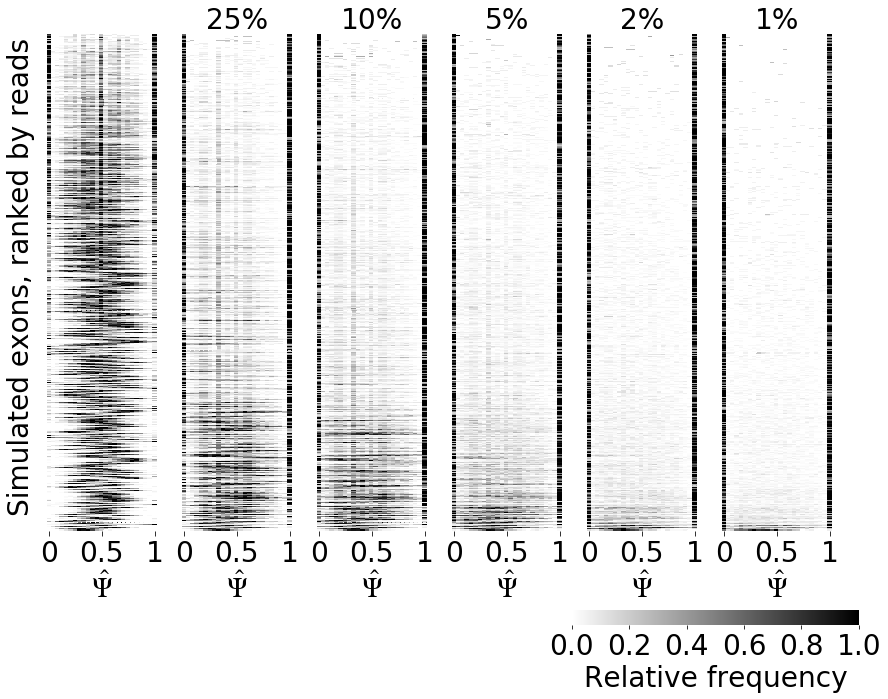

In [7]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"
hist_list = [bins_uni_true[1],  bins_uni_2[1], bins_uni_1[1], bins_uni_05[1], bins_uni_02[1], bins_uni_01[1]]
dset_name_list = ["", "25%", "10%", "5%", "2%", "1%"]

scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 12, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots/', plot_name = 'figure_2_unimodal_intermediate_biases',
                    plot_title = "", 
                    ylab='Simulated exons, ranked by reads', ls=28, sk=3, tfs=20, name_size=28)

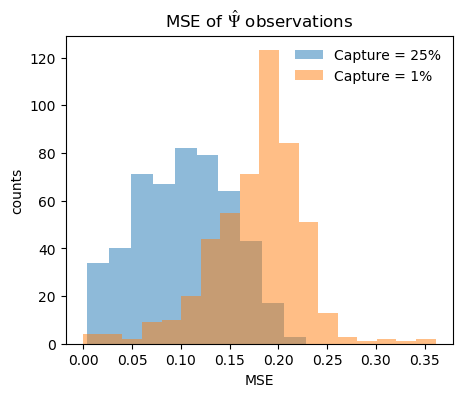

In [44]:
figsize(5, 4)
uni2_short = uni_2_psi.loc[uni_2_psi.index[:500]]
uni2_short.columns = uni_true_psi.columns
plt.hist(((uni2_short - uni_true_psi.loc[uni_true_psi.index[:500]])**2).sum(axis=1) / (300-(uni2_short.isna().sum(axis=1))), 
         alpha=0.5, bins=10, label='Capture = 25%')
uni2_short = uni_01_psi.loc[uni_2_psi.index[:500]]
uni2_short.columns = uni_true_psi.columns
plt.hist(((uni2_short - uni_true_psi.loc[uni_true_psi.index[:500]])**2).sum(axis=1) / (300-(uni2_short.isna().sum(axis=1))), 
         alpha=0.5, bins=18, label='Capture = 1%')
plt.title('MSE of $\hat{\Psi}$ observations')
plt.xlabel('MSE')
plt.ylabel('counts')
plt.legend(frameon=False)

### Cell SJ reads vs binary observations

-0.6747610035133969

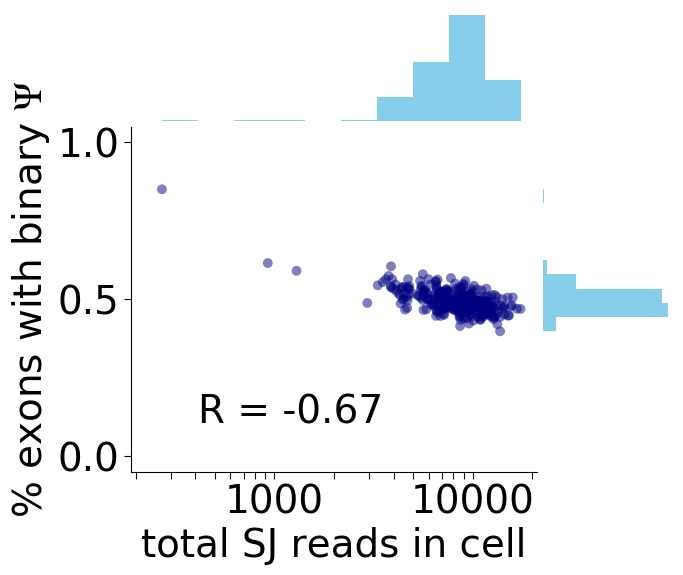

In [45]:
# import importlib
# importlib.reload(scp)

inter = uni_1_psi.loc[(uni_1_psi.mean(axis=1) >= 0.2) & (uni_1_psi.mean(axis=1) <= 0.8)].index

xlocations = [200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000]
xtags = ['', '', '', '', '', '', '', '', '1000', '', '', '', '', '', '', '', '', '10000', '']
scp.plot_cell_expression_v_binary(uni_1_psi.loc[inter], uni_1_counts.loc[inter], 'Unimodal', 
                                  'simulated_unimodal_data_capture_1',
                                  xlocations = xlocations, xtags=xtags, xlabel='total SJ reads in cell',
#                                   xlabel='total SJ reads in cell',
                                   xlim=(np.log10(190), np.log10(21000)),
                              plot_dir = 'plots', just_show=False)

-0.665732957299125

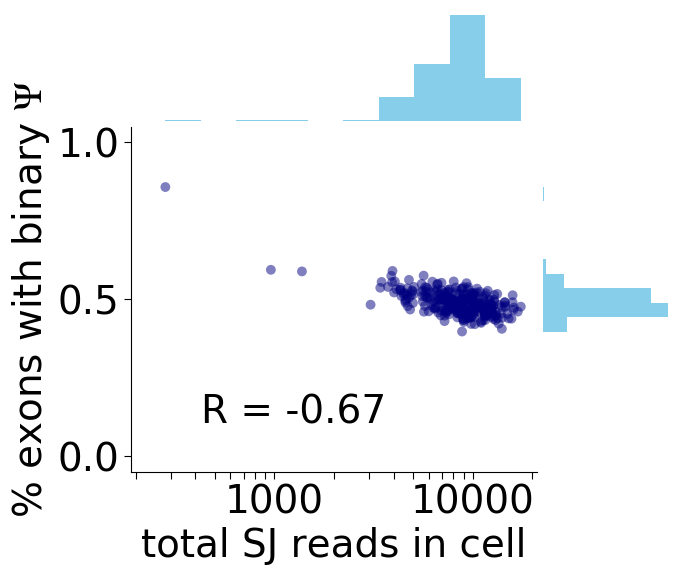

In [46]:
# import importlib
# importlib.reload(scp)

inter = uni_1_psi.iloc[range(500)].index

xlocations = [200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000]
xtags = ['', '', '', '', '', '', '', '', '1000', '', '', '', '', '', '', '', '', '10000', '']
scp.plot_cell_expression_v_binary(uni_1_psi.loc[inter], uni_1_counts.loc[inter], 'Unimodal', 
                                  'simulated_unimodal_data_capture_1_intermediate_only',
                                  xlocations = xlocations, xtags=xtags, xlabel='total SJ reads in cell',
#                                   xlabel='total SJ reads in cell',
                                   xlim=(np.log10(190), np.log10(21000)),
                              plot_dir = 'plots', just_show=False)

-0.7274746471953891

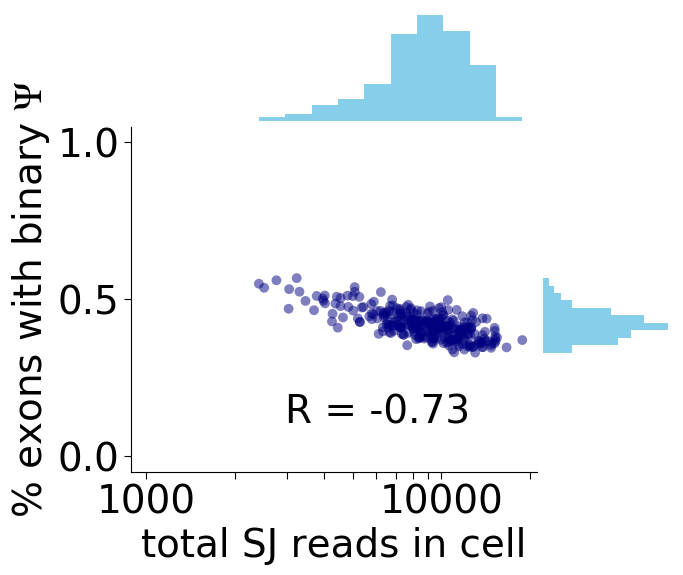

In [47]:
# import importlib
# importlib.reload(scp)

inter = uni_2_psi.loc[(uni_2_psi.mean(axis=1) >= 0.2) & (uni_2_psi.mean(axis=1) <= 0.8)].index

xlocations = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000]
xtags = ['1000', '', '', '', '', '', '', '', '', '10000', '']
scp.plot_cell_expression_v_binary(uni_2_psi.loc[inter], uni_2_counts.loc[inter], 'Unimodal', 
                                  'simulated_unimodal_data_capture_25',
                                  xlocations = xlocations, xtags=xtags, xlabel='total SJ reads in cell',
#                                   xlabel='total SJ reads in cell',
                                  xlim=(2.95, np.log10(21000)),
                                   
                              plot_dir = 'plots', just_show=False)

-0.7256598620485439

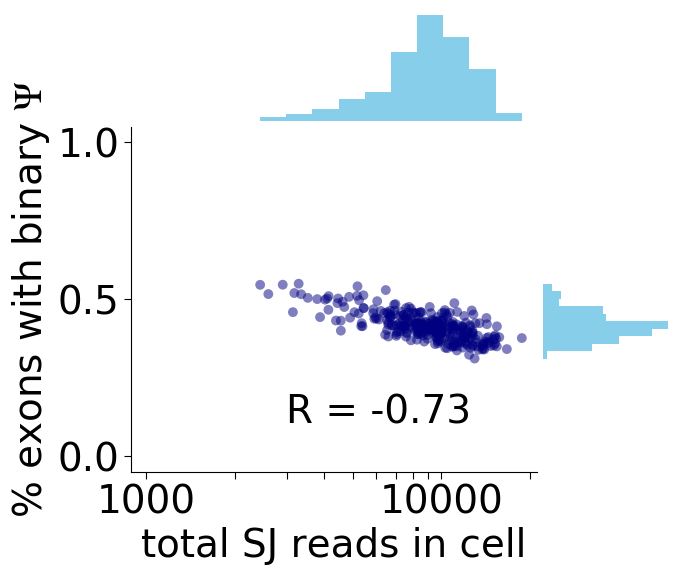

In [48]:
# import importlib
# importlib.reload(scp)

inter = uni_1_psi.iloc[range(500)].index

xlocations = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000]
xtags = ['1000', '', '', '', '', '', '', '', '', '10000', '']
scp.plot_cell_expression_v_binary(uni_2_psi.loc[inter], uni_2_counts.loc[inter], 'Unimodal', 
                                  'simulated_unimodal_data_capture_25_intermediate_only',
                                  xlocations = xlocations, xtags=xtags, xlabel='total SJ reads in cell',
#                                   xlabel='total SJ reads in cell',
                                  xlim=(2.95, np.log10(21000)),
                                   
                              plot_dir = 'plots', just_show=False)

-0.17903660610502783

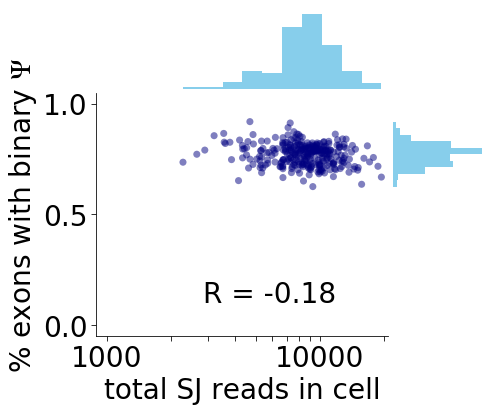

In [25]:
# import importlib
# importlib.reload(scp)

inter = uni_01_psi.loc[(uni_01_psi.mean(axis=1) >= 0.2) & (uni_01_psi.mean(axis=1) <= 0.8)].index

xlocations = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000]
xtags = ['1000', '', '', '', '', '', '', '', '', '10000', '']
scp.plot_cell_expression_v_binary(uni_01_psi.loc[inter], uni_01_counts.loc[inter], 'Unimodal', 
                                  'simulated_unimodal_data_capture_01',
                                  xlocations = xlocations, xtags=xtags, xlabel='total SJ reads in cell',
#                                   xlabel='total SJ reads in cell',
                                  xlim=(2.95, np.log10(21000)),
                                   
                              plot_dir = 'plots', just_show=False)

### Exon SJ v binary observations

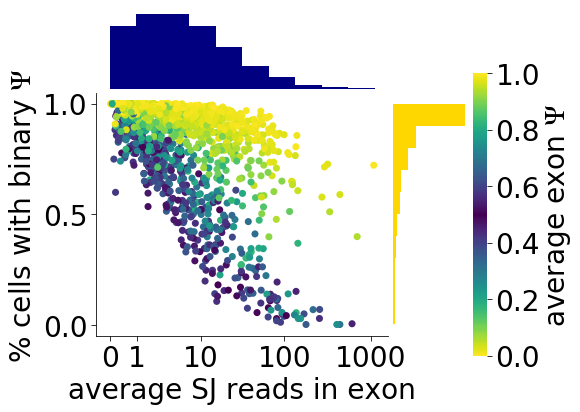

In [38]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"

# figsize(13, 12)

xlocations=[0, 1, 10, 100, 1000]
#xtags = ['25', '50', '100', '200', '400', '800']
scp.plot_ase_expression_v_binary(uni_1_psi, uni_1_counts, 'Unimodal', 'unimodal_simulation_capture_1', xlocations=xlocations,
                                 xlabel='average SJ reads in exon',
                              plot_dir = 'plots', just_show=False)

plt.show()

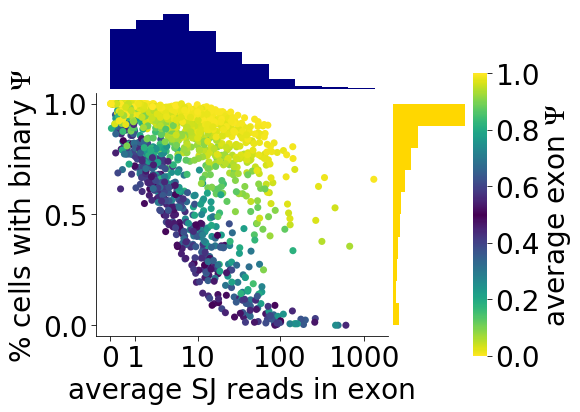

In [39]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"

# figsize(13, 12)

xlocations=[0, 1, 10, 100, 1000]
#xtags = ['25', '50', '100', '200', '400', '800']
scp.plot_ase_expression_v_binary(uni_2_psi, uni_2_counts, 'Unimodal', 'unimodal_simulation_capture_25', xlocations=xlocations,
                                 xlabel='average SJ reads in exon',
                              plot_dir = 'plots', just_show=False)

plt.show()

# Simulations with bimodal underlying $\Psi$

To get the tables in sim1, run the Rscript sim_realistic_data.R

In [49]:
bim_true_counts, bim_true_psi = spu.process_symsim_true('sim1/bimodal_true.tab', n=300, g=1500)
bim_2_counts, bim_2_psi = spu.process_symsim_observed('sim1/bimodal_observed_2.tab', gene_len, n=300, g=1500)
bim_1_counts, bim_1_psi = spu.process_symsim_observed('sim1/bimodal_observed_1.tab', gene_len, n=300, g=1500)
bim_05_counts, bim_05_psi = spu.process_symsim_observed('sim1/bimodal_observed_05.tab', gene_len, n=300, g=1500)
bim_02_counts, bim_02_psi = spu.process_symsim_observed('sim1/bimodal_observed_02.tab', gene_len, n=300, g=1500)
bim_01_counts, bim_01_psi = spu.process_symsim_observed('sim1/bimodal_observed_01.tab', gene_len, n=300, g=1500)

In [50]:
sort_bim_expression = bim_true_counts.mean(axis=1).sort_values().index
bins_bim_true = scp.get_bins_table(bim_true_psi, bim_true_counts)
bins_bim_2 = scp.get_bins_table(bim_2_psi, bim_true_counts)
bins_bim_1 = scp.get_bins_table(bim_1_psi, bim_true_counts)
bins_bim_05 = scp.get_bins_table(bim_05_psi, bim_true_counts)
bins_bim_02 = scp.get_bins_table(bim_02_psi, bim_true_counts)
bins_bim_01 = scp.get_bins_table(bim_01_psi, bim_true_counts)

### All simulated exons

In [51]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"
hist_list = [bins_bim_true[0], bins_bim_2[0], bins_bim_1[0], bins_bim_05[0], bins_bim_02[0], bins_bim_01[0]]
dset_name_list = ["True $\Psi$", "Capture = 0.25", "Capture = 0.1", "Capture = 0.05", "Capture = 0.02", "Capture = 0.01"]

# scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
#                     plot_dir = 'plots', plot_name = 'sim7_bimodal',
#                     plot_title = "", 
#                     ylab='Simulated exons', ls=12, sk=1.65, tfs=14, name_size=15)

### Intermediate exons

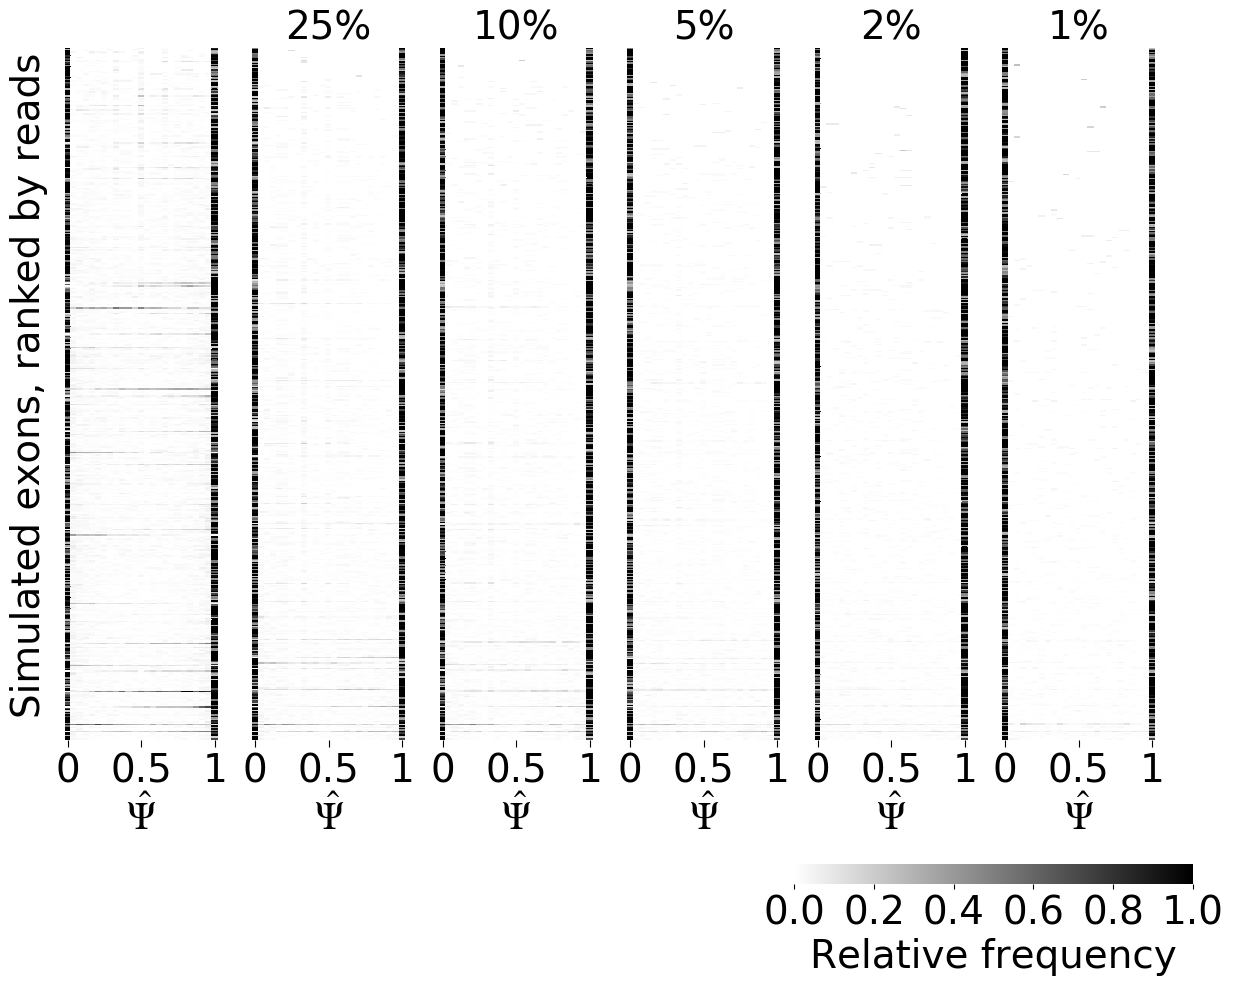

In [52]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"
hist_list = [bins_bim_true[1], bins_bim_2[1], bins_bim_1[1], bins_bim_05[1], bins_bim_02[1], bins_bim_01[1]]
dset_name_list = ["", "25%", "10%", "5%", "2%", "1%"]

scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 12, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots/', plot_name = 'sim7_bimodal_intermediate',
                    plot_title = "", 
                    ylab='Simulated exons, ranked by reads', ls=28, sk=3, tfs=20, name_size=28)




-0.4073013518917876

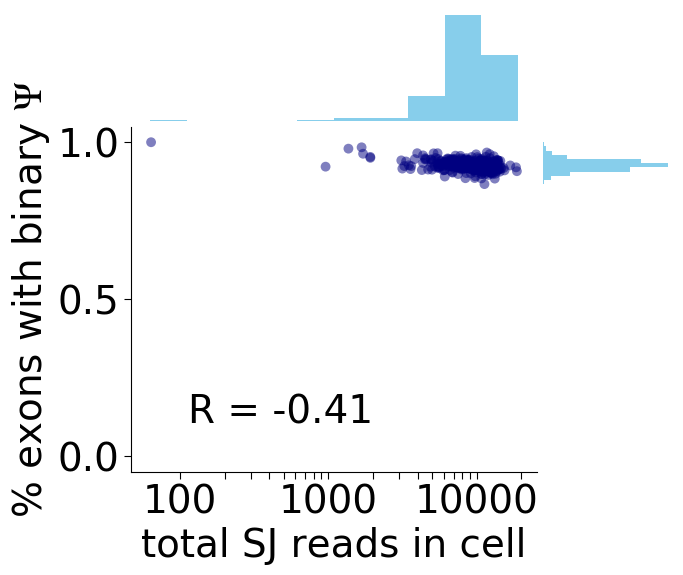

In [53]:
inter = uni_1_psi.iloc[range(500)].index
xlocations = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000]
#xtags = ['0.1', '1', '10']
scp.plot_cell_expression_v_binary(bim_1_psi.loc[inter], bim_1_counts.loc[inter], 'Bimodal', 
                                  'simulated_bimodal_data_intermediate_capture_1_intermediate_only', 
                              xlocations = xlocations, xlabel='total SJ reads in cell',#xlocations=[100, 1000, 10000],
                                  xtags=['100','','', '', '', '', '', '', '', '1000', '', '', '', '', '', '', '', '', '10000', ''],
                                  #xlim=(np.log10(290), np.log10(11000)),
                                  plot_dir = 'plots', just_show=False)

-0.4768889117437681

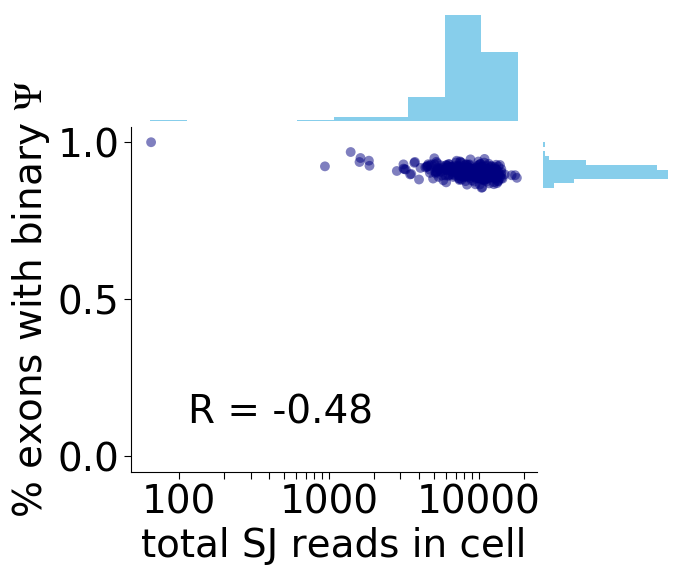

In [54]:
inter = uni_1_psi.loc[(bim_1_psi.mean(axis=1) >= 0.2) & (bim_1_psi.mean(axis=1) <= 0.8)].index
xlocations = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000]
#xtags = ['0.1', '1', '10']
scp.plot_cell_expression_v_binary(bim_1_psi.loc[inter], bim_1_counts.loc[inter], 'Bimodal', 
                                  'simulated_bimodal_data_intermediate_capture_1', 
                              xlocations = xlocations, xlabel='total SJ reads in cell',#xlocations=[100, 1000, 10000],
                                  xtags=['100','','', '', '', '', '', '', '', '1000', '', '', '', '', '', '', '', '', '10000', ''],
                                  #xlim=(np.log10(290), np.log10(11000)),
                                  plot_dir = 'plots', just_show=False)

-0.3865399028100129

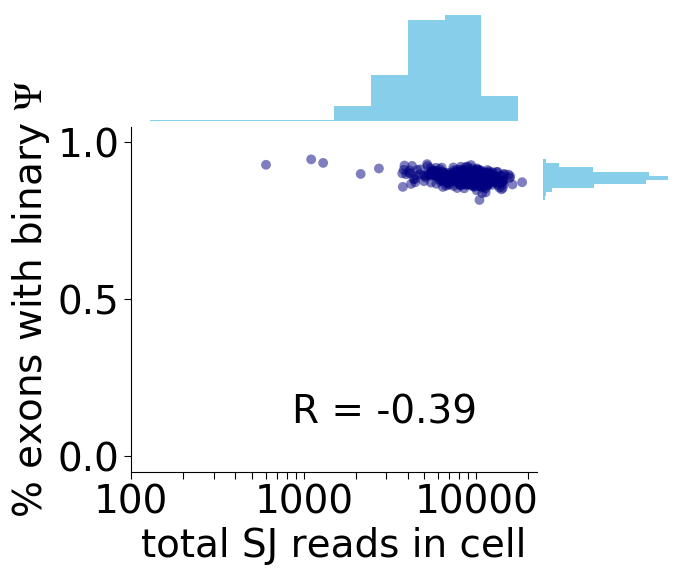

In [55]:
inter = uni_2_psi.loc[(bim_2_psi.mean(axis=1) >= 0.2) & (bim_2_psi.mean(axis=1) <= 0.8)].index
xlocations = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000]
#xtags = ['0.1', '1', '10']
scp.plot_cell_expression_v_binary(bim_2_psi.loc[inter], bim_2_counts.loc[inter], 'Bimodal', 
                                  'simulated_bimodal_data_intermediate_capture_25', 
                              xlocations = xlocations, xlabel='total SJ reads in cell',#xlocations=[100, 1000, 10000],
                                  xtags=['100','','', '', '', '', '', '', '', '1000', '', '', '', '', '', '', '', '', '10000', ''],
                                  #xlim=(np.log10(290), np.log10(11000)),
                                  plot_dir = 'plots', just_show=False)

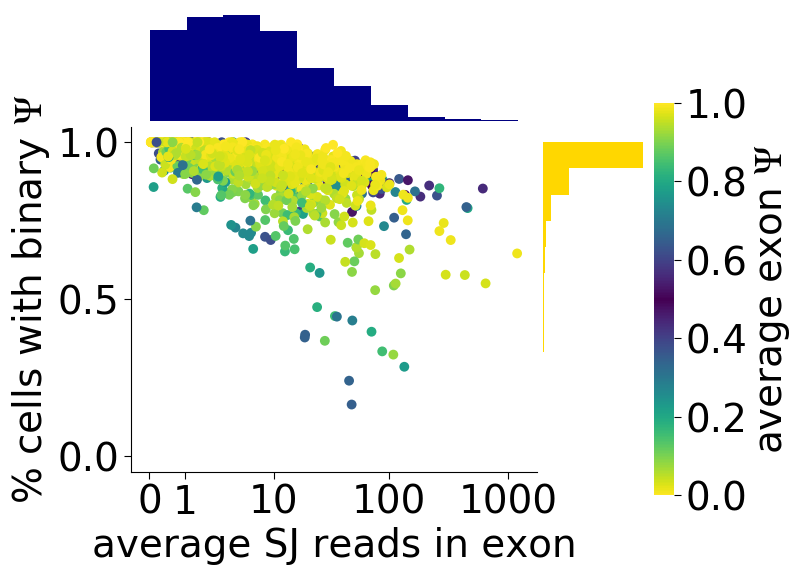

In [56]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"

# figsize(13, 12)

xlocations=[0, 1, 10, 100, 1000]
#xtags = ['25', '50', '100', '200', '400', '800']
scp.plot_ase_expression_v_binary(bim_1_psi.dropna(how='all'), bim_1_counts.loc[bim_1_psi.dropna(how='all').index], 
                                 'Bimodal', 'bimodal_simulation_capture_1', xlocations=xlocations,
                                 xlabel='average SJ reads in exon',
                              plot_dir = 'plots', just_show=False)

plt.show()

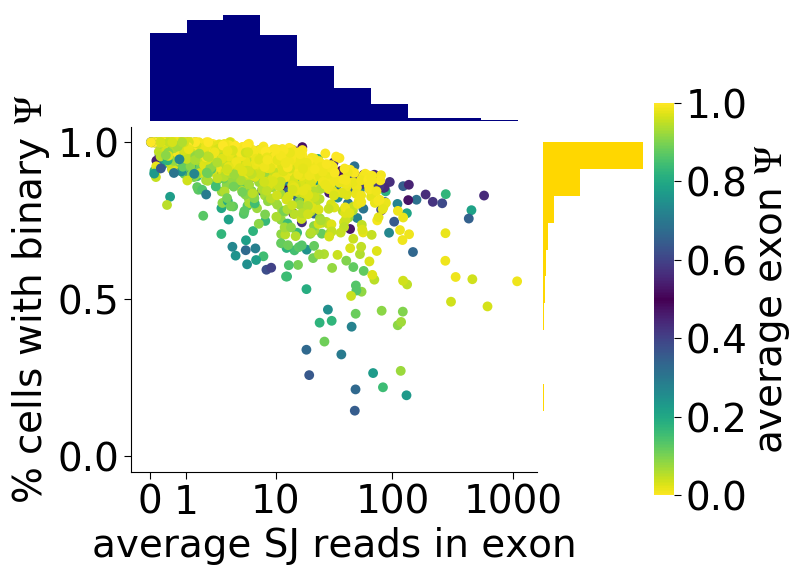

In [57]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
# mpl.rcParams["mathtext.fontset"] = "stix"

# figsize(13, 12)

xlocations=[0, 1, 10, 100, 1000]
#xtags = ['25', '50', '100', '200', '400', '800']
scp.plot_ase_expression_v_binary(bim_2_psi.dropna(how='all'), bim_2_counts.loc[bim_2_psi.dropna(how='all').index], 
                                 'Bimodal', 'bimodal_simulation_capture_25', xlocations=xlocations,
                                 xlabel='average SJ reads in exon',
                              plot_dir = 'plots', just_show=False)

plt.show()

In [44]:
uni_2_psi_int = uni_2_psi.loc[(uni_2_psi.mean(axis=1) >= 0.2) & (uni_2_psi.mean(axis=1) <= 0.8)]
uni_1_psi_int = uni_1_psi.loc[(uni_1_psi.mean(axis=1) >= 0.2) & (uni_1_psi.mean(axis=1) <= 0.8)]
uni_05_psi_int = uni_05_psi.loc[(uni_05_psi.mean(axis=1) >= 0.2) & (uni_05_psi.mean(axis=1) <= 0.8)]
uni_02_psi_int = uni_02_psi.loc[(uni_02_psi.mean(axis=1) >= 0.2) & (uni_02_psi.mean(axis=1) <= 0.8)]
uni_01_psi_int = uni_01_psi.loc[(uni_01_psi.mean(axis=1) >= 0.2) & (uni_01_psi.mean(axis=1) <= 0.8)]

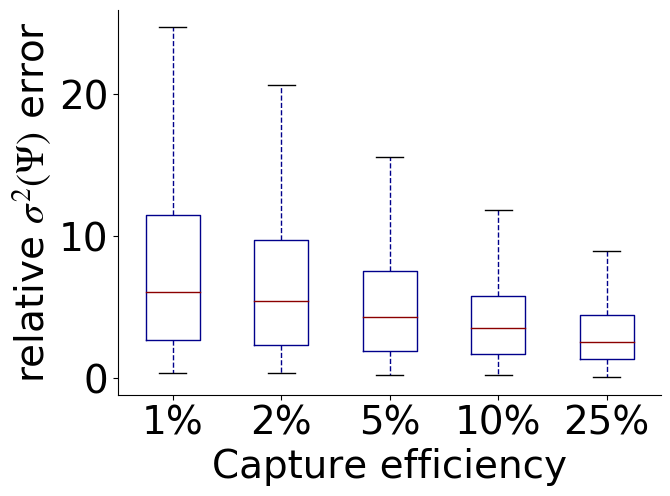

In [52]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"
# mpl.rcParams['pdf.fonttype'] = 42


fig = plt.figure(figsize=(7,5))

ax  = plt.subplot(1,1,1)

obs_var_01 = uni_01_psi_int.var(axis=1)
true_var_01 = uni_true_psi.loc[uni_01_psi_int.index].var(axis=1)
scaled_var_01 = np.abs(obs_var_01 - true_var_01)/true_var_01

obs_var_02 = uni_02_psi_int.var(axis=1)
true_var_02 = uni_true_psi.loc[uni_02_psi_int.index].var(axis=1)
scaled_var_02 = np.abs(obs_var_02 - true_var_02)/true_var_02

obs_var_05 = uni_05_psi_int.var(axis=1)
true_var_05 = uni_true_psi.loc[uni_05_psi_int.index].var(axis=1)
scaled_var_05 = np.abs(obs_var_05 - true_var_05)/true_var_05

obs_var_1 = uni_1_psi_int.var(axis=1)
true_var_1 = uni_true_psi.loc[uni_1_psi_int.index].var(axis=1)
scaled_var_1 = np.abs(obs_var_1 - true_var_1)/true_var_1

obs_var_2 = uni_2_psi_int.var(axis=1)
true_var_2 = uni_true_psi.loc[uni_2_psi_int.index].var(axis=1)
scaled_var_2 = np.abs(obs_var_2 - true_var_2)/true_var_2

bp = plt.boxplot([scaled_var_01, scaled_var_02, scaled_var_05, scaled_var_1, scaled_var_2], showfliers=False)

plt.setp(bp['boxes'], color='darkblue', linewidth=1)
plt.setp(bp['whiskers'], color='darkblue', linewidth=1, linestyle='--')
plt.setp(bp['caps'], color='black', linewidth=1)
plt.setp(bp['medians'], color='darkred', linewidth=1)

# plt.scatter(np.log10(uni_true_counts.loc[uni_01_psi_int.index].mean(axis=1)+1),
            

#     (np.abs(uni_01_psi_int.var(axis=1) - uni_true_psi.loc[uni_01_psi_int.index].var(axis=1))/uni_true_psi.loc[uni_01_psi_int.index].var(axis=1)), 
#             c='navy', alpha=0.5, label = '1%', s=50, edgecolors='none')

# plt.scatter(np.log10(uni_true_counts.loc[uni_02_psi_int.index].mean(axis=1)+1),
#     (np.abs(uni_02_psi_int.var(axis=1) - uni_true_psi.loc[uni_02_psi_int.index].var(axis=1)))/uni_true_psi.loc[uni_02_psi_int.index].var(axis=1), 
#             c='darkorange', alpha=0.5, label = '2%', s=50, edgecolors='none')

# plt.scatter(np.log10(uni_true_counts.loc[uni_05_psi_int.index].mean(axis=1)+1),
#     (np.abs(uni_05_psi_int.var(axis=1) - uni_true_psi.loc[uni_05_psi_int.index].var(axis=1)))/uni_true_psi.loc[uni_05_psi_int.index].var(axis=1), 
#             c='forestgreen', alpha=0.5, label = '5%', s=50, edgecolors='none')

# plt.scatter(np.log10(uni_true_counts.loc[uni_1_psi_int.index].mean(axis=1)+1), 
#             (np.abs(uni_1_psi_int.var(axis=1) - uni_true_psi.loc[uni_1_psi_int.index].var(axis=1)))/uni_true_psi.loc[uni_1_psi_int.index].var(axis=1), 
#             c='red', alpha=0.5, label = '10%', s=50, edgecolors='none')



plt.xlabel('Capture efficiency', fontsize=28)
plt.ylabel('relative $\sigma^2(\Psi)$ error', fontsize=28)

# plt.legend(frameon=False,  prop={'size': 20})

ax.tick_params(labelsize=28)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.spines['left'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)

# ax.xaxis.set_tick_params(width=2)
# ax.yaxis.set_tick_params(width=2)

xlocs = [1, 2, 3, 4, 5]
xtags = ['1%', '2%', '5%', '10%', '25%']
plt.xticks(xlocs, xtags)

# plt.ylim((-1, 40))

plt.savefig('plots/unimodal_absolute_variance_error.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots/unimodal_absolute_variance_error.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots/unimodal_absolute_variance_error.png', bbox_inches='tight', transparent=True)

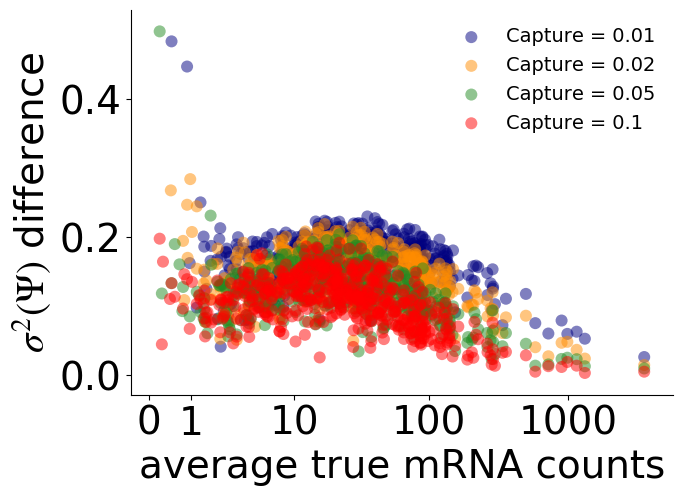

In [59]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"
# mpl.rcParams['pdf.fonttype'] = 42


fig = plt.figure(figsize=(7,5))

ax  = plt.subplot(1,1,1)



plt.scatter(np.log10(uni_true_counts.loc[uni_01_psi_int.index].mean(axis=1)+1),
    (np.abs(uni_01_psi_int.var(axis=1) - uni_true_psi.loc[uni_01_psi_int.index].var(axis=1))), 
            c='navy', alpha=0.5, label = 'Capture = 0.01', s=75, edgecolors='none')

plt.scatter(np.log10(uni_true_counts.loc[uni_02_psi_int.index].mean(axis=1)+1),
    (np.abs(uni_02_psi_int.var(axis=1) - uni_true_psi.loc[uni_02_psi_int.index].var(axis=1))), 
            c='darkorange', alpha=0.5, label = 'Capture = 0.02', s=75, edgecolors='none')

plt.scatter(np.log10(uni_true_counts.loc[uni_05_psi_int.index].mean(axis=1)+1),
    (np.abs(uni_05_psi_int.var(axis=1) - uni_true_psi.loc[uni_05_psi_int.index].var(axis=1))), 
            c='forestgreen', alpha=0.5, label = 'Capture = 0.05', s=75, edgecolors='none')

plt.scatter(np.log10(uni_true_counts.loc[uni_1_psi_int.index].mean(axis=1)+1), 
            (np.abs(uni_1_psi_int.var(axis=1) - uni_true_psi.loc[uni_1_psi_int.index].var(axis=1))), 
            c='red', alpha=0.5, label = 'Capture = 0.1', s=75, edgecolors='none')



plt.xlabel('average true mRNA counts', fontsize=28)
plt.ylabel('$\sigma^2(\Psi)$ difference', fontsize=28)

plt.legend(frameon=False,  prop={'size': 14})

ax.tick_params(labelsize=28)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.spines['left'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)

# ax.xaxis.set_tick_params(width=2)
# ax.yaxis.set_tick_params(width=2)

xlocations = [0, 1, 10, 100, 1000]
xlocs = np.array([np.log10(x+1) for x in xlocations])
xtags = [str(i) for i in xlocations]
plt.xticks(xlocs, xtags)

plt.savefig('plots/beta_unif_unimodal_int_variance_diff.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots/beta_unif_unimodal_int_variance_diff.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots/beta_unif_unimodal_int_variance_diff.png', bbox_inches='tight', transparent=True)

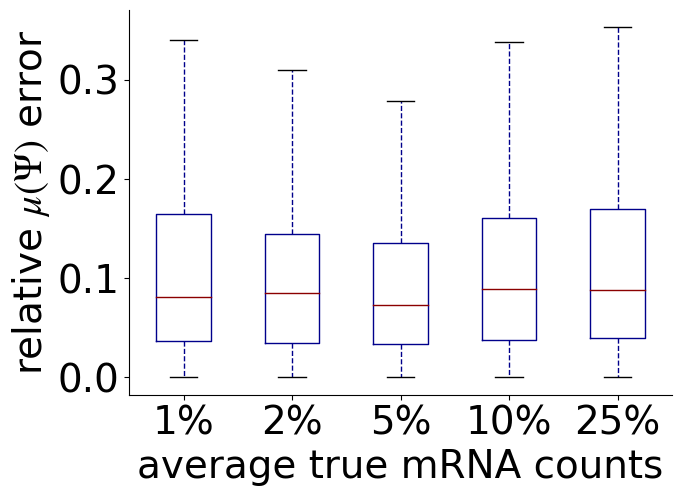

In [51]:
fig = plt.figure(figsize=(7,5))

ax  = plt.subplot(1,1,1)


obs_mean_01 = uni_01_psi_int.mean(axis=1)
true_mean_01 = uni_true_psi.loc[uni_01_psi_int.index].mean(axis=1)
scaled_mean_01 = np.abs(obs_mean_01 - true_mean_01)/true_mean_01

obs_mean_02 = uni_02_psi_int.mean(axis=1)
true_mean_02 = uni_true_psi.loc[uni_02_psi_int.index].mean(axis=1)
scaled_mean_02 = np.abs(obs_mean_02 - true_mean_02)/true_mean_02

obs_mean_05 = uni_05_psi_int.mean(axis=1)
true_mean_05 = uni_true_psi.loc[uni_05_psi_int.index].mean(axis=1)
scaled_mean_05 = np.abs(obs_mean_05 - true_mean_05)/true_mean_05

obs_mean_1 = uni_1_psi_int.mean(axis=1)
true_mean_1 = uni_true_psi.loc[uni_1_psi_int.index].mean(axis=1)
scaled_mean_1 = np.abs(obs_mean_1 - true_mean_1)/true_mean_1

obs_mean_2 = uni_2_psi_int.mean(axis=1)
true_mean_2 = uni_true_psi.loc[uni_2_psi_int.index].mean(axis=1)
scaled_mean_2 = np.abs(obs_mean_2 - true_mean_2)/true_mean_2

bp = plt.boxplot([scaled_mean_01, scaled_mean_02, scaled_mean_05, scaled_mean_1, scaled_mean_2], showfliers=False)

plt.setp(bp['boxes'], color='darkblue', linewidth=1)
plt.setp(bp['whiskers'], color='darkblue', linewidth=1, linestyle='--')
plt.setp(bp['caps'], color='black', linewidth=1)
plt.setp(bp['medians'], color='darkred', linewidth=1)


# plt.legend(frameon=False,  prop={'size': 14})

ax.tick_params(labelsize=28)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.spines['left'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)

# ax.xaxis.set_tick_params(width=2)
# ax.yaxis.set_tick_params(width=2)

plt.xlabel('average true mRNA counts', fontsize=28)
plt.ylabel('relative $\mu(\Psi)$ error', fontsize=28)

xlocs = [1, 2, 3, 4, 5]
xtags = ['1%', '2%', '5%', '10%', '25%']
plt.xticks(xlocs, xtags)


plt.savefig('plots/unimodal_absolute_mean_error.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots/unimodal_absolute_mean_error.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots/unimodal_absolute_mean_error.png', bbox_inches='tight', transparent=True)

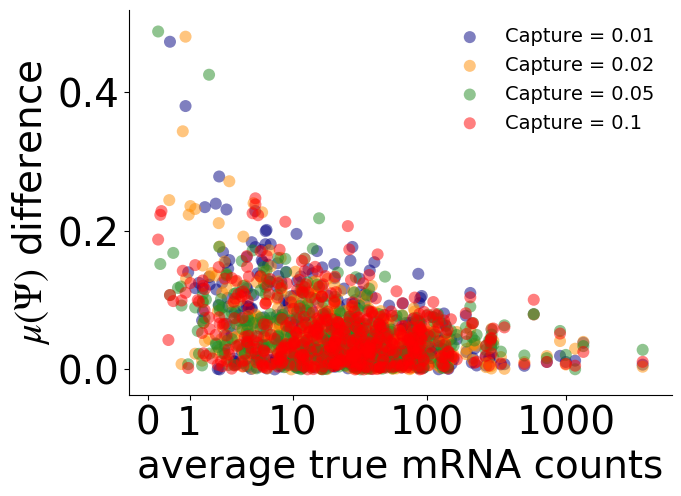

In [60]:
fig = plt.figure(figsize=(7,5))

ax  = plt.subplot(1,1,1)

plt.scatter(np.log10(uni_true_counts.loc[uni_01_psi_int.index].mean(axis=1)+1),
    (np.abs(uni_01_psi_int.mean(axis=1) - uni_true_psi.loc[uni_01_psi_int.index].mean(axis=1))), 
            c='navy', alpha=0.5, label = 'Capture = 0.01', s=75, edgecolors='none')

plt.scatter(np.log10(uni_true_counts.loc[uni_02_psi_int.index].mean(axis=1)+1),
    (np.abs(uni_02_psi_int.mean(axis=1) - uni_true_psi.loc[uni_02_psi_int.index].mean(axis=1))), 
            c='darkorange', alpha=0.5, label = 'Capture = 0.02', s=75, edgecolors='none')

plt.scatter(np.log10(uni_true_counts.loc[uni_05_psi_int.index].mean(axis=1)+1),
    (np.abs(uni_05_psi_int.mean(axis=1) - uni_true_psi.loc[uni_05_psi_int.index].mean(axis=1))), 
            c='forestgreen', alpha=0.5, label = 'Capture = 0.05', s=75, edgecolors='none')

plt.scatter(np.log10(uni_true_counts.loc[uni_1_psi_int.index].mean(axis=1)+1), 
            (np.abs(uni_1_psi_int.mean(axis=1) - uni_true_psi.loc[uni_1_psi_int.index].mean(axis=1))), 
            c='red', alpha=0.5, label = 'Capture = 0.1', s=75, edgecolors='none')


plt.legend(frameon=False,  prop={'size': 14})

ax.tick_params(labelsize=28)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.spines['left'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)

# ax.xaxis.set_tick_params(width=2)
# ax.yaxis.set_tick_params(width=2)

plt.xlabel('average true mRNA counts', fontsize=28)
plt.ylabel('$\mu(\Psi)$ difference', fontsize=28)

xlocations = [0, 1, 10, 100, 1000]
xlocs = np.array([np.log10(x+1) for x in xlocations])
xtags = [str(i) for i in xlocations]
plt.xticks(xlocs, xtags)


plt.savefig('plots/beta_unif_unimodal_int_mean_diff.svg', bbox_inches='tight', transparent=True)
plt.savefig('plots/beta_unif_unimodal_int_mean_diff.pdf', bbox_inches='tight', transparent=True)
plt.savefig('plots/beta_unif_unimodal_int_mean_diff.png', bbox_inches='tight', transparent=True)